In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregar o arquivo GeoJSON
gdf = gpd.read_file('japan.geojson')

# Exibir os dados
print(gdf.head())

            nam nam_ja  id                                           geometry
0      Kyoto Fu    京都府  26  MULTIPOLYGON (((135.03670 35.53733, 135.03520 ...
1      Saga Ken    佐賀県  41  MULTIPOLYGON (((129.86220 33.58753, 129.85770 ...
2  Kumamoto Ken    熊本県  43  MULTIPOLYGON (((131.11040 33.18313, 131.11479 ...
3    Kagawa Ken    香川県  37  MULTIPOLYGON (((134.33200 34.56313, 134.33510 ...
4     Aichi Ken    愛知県  23  MULTIPOLYGON (((136.96091 35.41453, 136.96300 ...


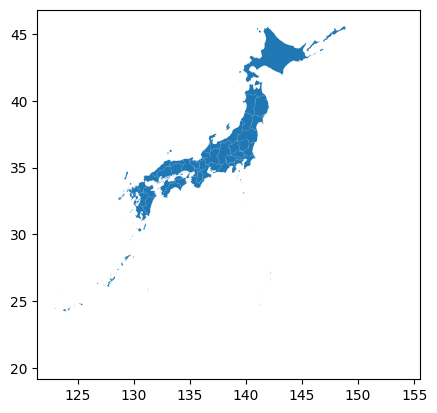

In [3]:
# Plotar o mapa
gdf.plot()
plt.show()

In [5]:
from shapely.geometry import shape
import matplotlib.pyplot as plt

# Função para converter geometrias
def convert_geometries(geojson_data):
    geometries = []
    for feature in geojson_data['features']:
        geometries.append(shape(feature['geometry']))
    return geometries

# Converter geometrias do GeoJSON
geometries = convert_geometries(gdf)

# Plotar as geometrias
fig, ax = plt.subplots(figsize=(10, 10))
for geom in geometries:
    x, y = geom.exterior.xy if geom.geom_type == 'Polygon' else zip(*[(g.exterior.xy) for g in geom.geoms])
    ax.plot(x, y, color='blue')

ax.set_title('Geographical Map of Japan')
plt.show()

KeyError: 'features'

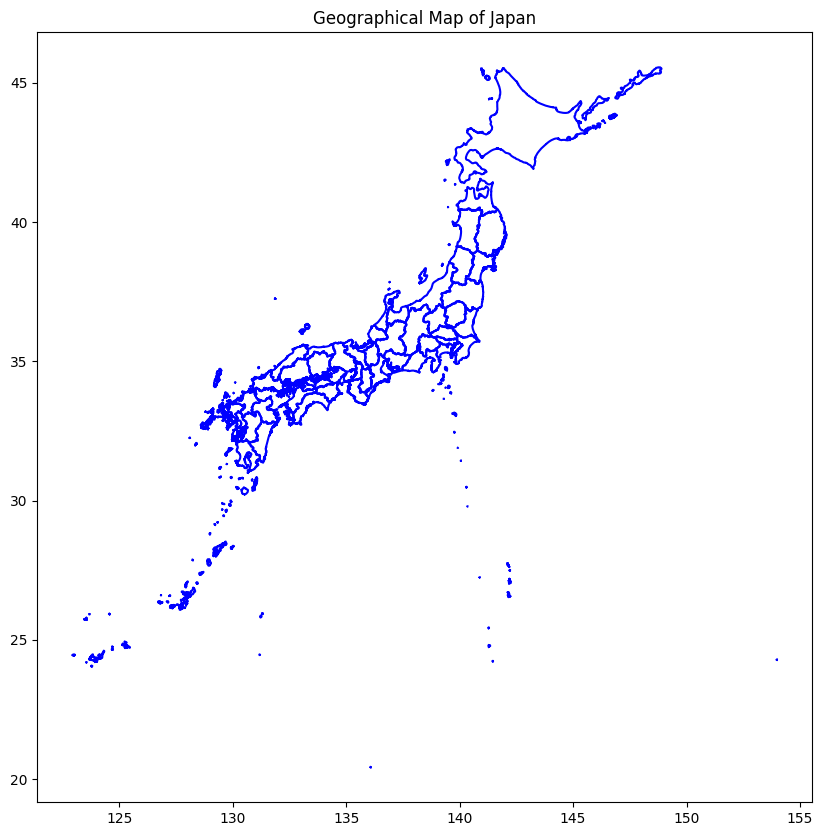

In [6]:
from shapely.geometry import shape, Polygon, MultiPolygon
import json
import matplotlib.pyplot as plt

# Função para converter geometrias do GeoJSON para Shapely
def convert_geometries(geojson_data):
    geometries = []
    for feature in geojson_data['features']:
        geometries.append(shape(feature['geometry']))
    return geometries

# Carregar o arquivo GeoJSON
file_path = 'japan.geojson'
with open(file_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# Converter geometrias
geometries = convert_geometries(geojson_data)

# Plotar as geometrias
fig, ax = plt.subplots(figsize=(10, 10))
for geom in geometries:
    if isinstance(geom, Polygon):
        x, y = geom.exterior.xy
        ax.plot(x, y, color='blue')
    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:
            x, y = poly.exterior.xy
            ax.plot(x, y, color='blue')

ax.set_title('Geographical Map of Japan')
plt.show()

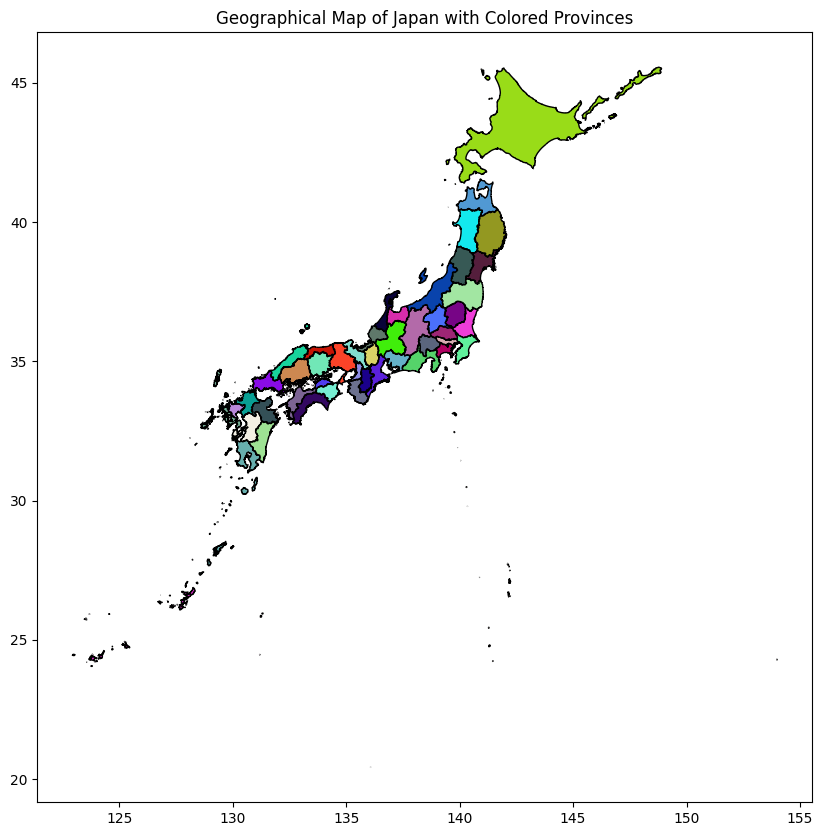

In [7]:
from shapely.geometry import shape, Polygon, MultiPolygon
import json
import matplotlib.pyplot as plt
import random

# Função para converter geometrias do GeoJSON para Shapely
def convert_geometries(geojson_data):
    geometries = []
    for feature in geojson_data['features']:
        geometries.append(shape(feature['geometry']))
    return geometries

# Função para gerar cores aleatórias
def generate_random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# Carregar o arquivo GeoJSON
file_path = 'japan.geojson'
with open(file_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# Converter geometrias
geometries = convert_geometries(geojson_data)

# Atribuir cores às províncias
colors = [generate_random_color() for _ in geometries]

# Plotar as geometrias com cores diferentes
fig, ax = plt.subplots(figsize=(10, 10))
for geom, color in zip(geometries, colors):
    if isinstance(geom, Polygon):
        x, y = geom.exterior.xy
        ax.fill(x, y, color=color, edgecolor='k')
    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:
            x, y = poly.exterior.xy
            ax.fill(x, y, color=color, edgecolor='k')

ax.set_title('Geographical Map of Japan with Colored Provinces')
plt.show()